# Solving ME with qutip

## Time independent

In [2]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Levels
a_state = qt.basis(3, 0)
b_state = qt.basis(3, 1)
c_state = qt.basis(3, 2)
N = 2 # set truncation Fock state

#Operators 
sigma_ab = qt.tensor(qt.qeye(N), a_state*b_state.dag())
sigma_cb = qt.tensor(qt.qeye(N), c_state*b_state.dag())
N_a = qt.tensor(qt.qeye(N), a_state*a_state.dag())
N_b = qt.tensor(qt.qeye(N), b_state*b_state.dag())
N_c = qt.tensor(qt.qeye(N), c_state*c_state.dag())

In [10]:
times = np.linspace(0.0, 10.0, 200)
Omega = 1.0 # Drive
gamma_1 = 1 # Dissipation

# Hamiltonian
H = Omega*(sigma_ab + sigma_ab.dag())

# Collapse operators (dissipation)
c_ops1 = [gamma_1*sigma_ab, gamma_1*sigma_cb]

# Operators for which to evaluate expectation values
expt_ops = [N_a, N_b, N_c]

# Initial state
psi0 = qt.tensor(qt.basis(N, 0), a_state)
rho0 = psi0*psi0.dag() # density matrix

In [11]:
result = qt.mesolve(H, rho0, times, c_ops1, [N_a, N_b, N_c])

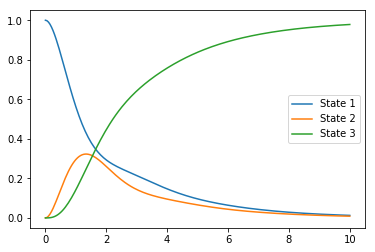

In [13]:
plt.plot(times, result.expect[0])
plt.plot(times, result.expect[1])
plt.plot(times, result.expect[2])
plt.legend(("State 1", "State 2", "State 3"))
plt.show()

### Time dependent drive

In [27]:
def gaussian_pulse(t, args):
    return args['A']*np.cos(args['w']*t)*np.exp(-((t - args['mu'])/args['omega'])**2)

def on_off_drive(t, args):
    if t > T:
        p = 1
    else:
        p = 0
    return p

**On-Off Drive**

In [28]:
times = np.linspace(0.0, 20.0, 200)
T = 10 # time when we switch on the drive

# Hamiltonian
H_it = (N_a+N_b+N_c) # time independent term. In this is just the identity
H_t = (sigma_ab + sigma_ab.dag()) # time dependent
Ht = [H_it, [H_t, on_off_drive]]


result_OFD = qt.mesolve(Ht, psi0, times, c_ops1, [N_a, N_b, N_c], args = {'T': T})

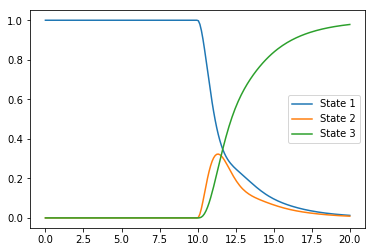

In [29]:
plt.plot(times, result_OFD.expect[0])
plt.plot(times, result_OFD.expect[1])
plt.plot(times, result_OFD.expect[2])
plt.legend(("State 1", "State 2", "State 3" ))
plt.show()

**Gaussian pulse**

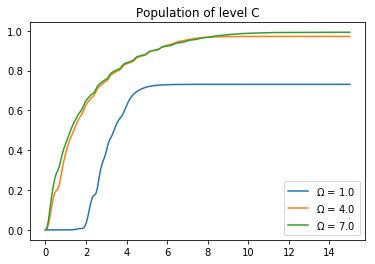

In [38]:
times = np.linspace(0.0, 15.0, 200)

# frequencies to explore
omega = np.linspace(1, 7, num = 3)

# Hamiltonian
H_GP = [H_it, [H_t, gaussian_pulse]]


for O in omega:
    result_GP = qt.mesolve(H_GP, psi0, times, c_ops1, [N_a, N_b, N_c],args = {'w': 5, 'omega': O, 'mu': 3, 'A':10})
    
    
    plt.plot(times, result_GP.expect[2], label='$\\Omega$ = '+str(round(O,2)))


plt.title('Population of level C')
plt.legend()
plt.show()